In this example we will see how to perform radiometric calibration and determine top of air reflectance of landsat images(Common for other images too)

In [23]:
#import the library (Assuming the library is already installed )
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#define calibration function
def radiometric_calibration(band, reflectance_mult, reflectance_add, sun_elevation):
    # Convert sun elevation to radians
    sun_elevation_rad = np.radians(sun_elevation)
    # Calculate TOA reflectance
    calibrated_band = (reflectance_mult * band + reflectance_add) / np.sin(sun_elevation_rad)
    return calibrated_band


In [25]:
# Values of reflectance additive and multiplicative band and sun elevation angle(From metadata of image)
reflectance_mult = 2.0000E-05
reflectance_add = -0.10000
sun_elevation = 43.00751079

In [26]:
# read the image band(For example band 2-blue band of landsat 8)
path_to_band = '/content/rasters/LC08_L1TP_142041_20241022_20241029_02_T1_B5.TIF'
with rasterio.open(path_to_band) as src:
    band = src.read(1)
    #call calibration function
    calibrated_band = radiometric_calibration(band, reflectance_mult, reflectance_add, sun_elevation)


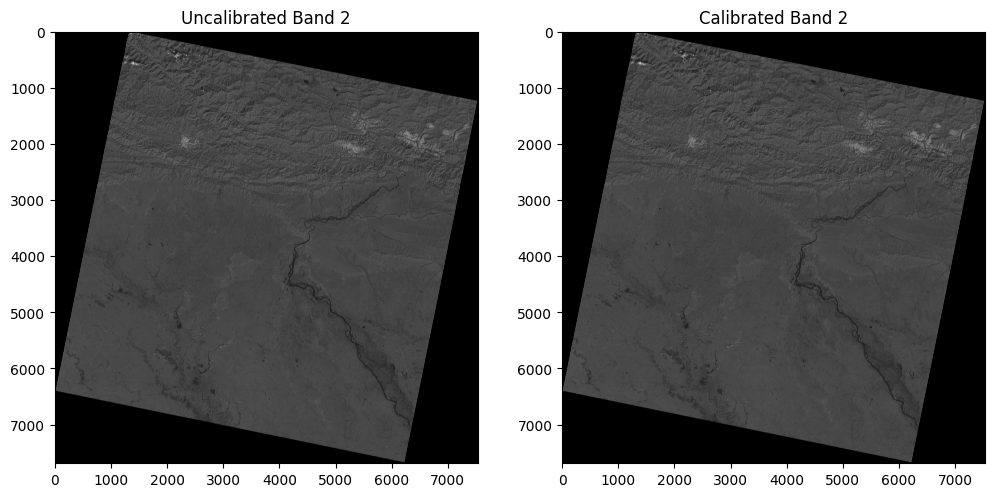

In [27]:

# Display both uncalibrated and calibrated bands side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(band, cmap='gray')
axes[0].set_title('Uncalibrated Band 2')

axes[1].imshow(calibrated_band, cmap='gray')
axes[1].set_title('Calibrated Band 2')
plt.savefig('Radiometric Calibration')
plt.show()

In [28]:
#save the corrected band to a new file
output_path = '/content/output_raster/b5_Toa.tif'
with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=calibrated_band.shape[0],
    width=calibrated_band.shape[1],
    count=1,
    dtype=calibrated_band.dtype,
    crs=src.crs,
    transform=src.transform,
) as dst:
    dst.write(calibrated_band, 1)


Similarly perform radiometric calibration for each band one by one. We can perform radiometric calibration of all band at once using loop but this is not the scope of this example